# Classification problem

# Research question: 
Can you predict an App success based on its features from Google Play Store (success is defined as having a mean rating above 4.2 and at least 100 000 installs). Data set from Kaggel(web scraping).
https://www.kaggle.com/lava18/google-play-store-apps
Method: Decision tree model

In [2]:
#Importing the packages 

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

# Mount local files
from google.colab import drive
# drive.mount('/gdrive')

ModuleNotFoundError: No module named 'google'

## Load the data

In [0]:
fv = pd.read_csv("/gdrive/My Drive/AI/CURRICULUM/Giovanna/170619/170619final_feature_vector.csv")

In [0]:
fv.shape

(9351, 73)

In [0]:
fv.head()

,Successful_App,Type_Free,Type_Paid,Size_group_big,Size_group_small,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Current Ver_clean_levels_high,Current Ver_clean_levels_low,Current Ver_clean_levels_medium,reviews_levels_high,reviews_levels_low,reviews_levels_medium,Android Ver_levels_high,Android Ver_levels_low,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
non_category_features = [i for i in fv.columns.tolist() if i[:8] != 'Category']

In [0]:
fv = fv[non_category_features]

In [0]:
#Hyperparameters:
#1)max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits 
#it has and it captures more information about the data. We fit a decision tree
#with depths ranging from 1 to 32 and plot the training and test auc scores.

#2)min_samples_split
#min_samples_split represents the minimum number of samples required to split an internal node. 
#This can vary between considering at least one sample at each node to considering all of the samples at each node. 
#When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. 
#Here we will vary the parameter from 10% to 100% of the samples

#3)min_samples_leaf: is The minimum number of samples required to be at a leaf node
#This parameter is similar to min_samples_splits, however, 
#this describe the minimum number of samples of samples at the leafs, the base of the tree.

#4)max_features:
#max_features represents the number of features to consider when looking for the best split.
#5) random state to 42 which means the results will be the same each time I run the split for reproducible results.

In [0]:
fv.head()

,Successful_App,Type_Free,Type_Paid,Size_group_big,Size_group_small,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Current Ver_clean_levels_high,Current Ver_clean_levels_low,Current Ver_clean_levels_medium,reviews_levels_high,reviews_levels_low,reviews_levels_medium,Android Ver_levels_high,Android Ver_levels_low,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


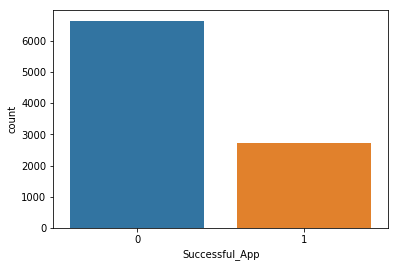

In [0]:
sns.countplot(fv['Successful_App'])

## Train/Test Split

In [0]:
X = fv.drop(['Successful_App'], axis=1)
y = fv['Successful_App']
# we keep 33% of data for test dataset: cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

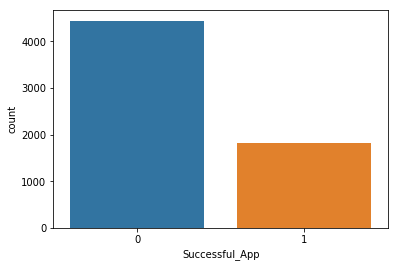

In [0]:
sns.countplot(y_train)

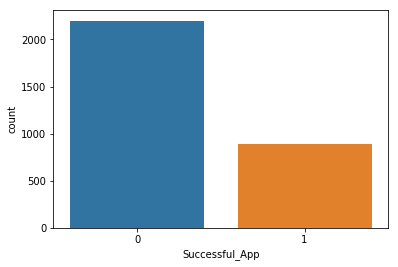

In [0]:
sns.countplot(y_test)

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

![gini](giniindex.png)

## Decision Tree - Grid Search & Cross Validation

See the list of scoring functions [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

![decision_tree](decision_tree_hyper.png)

In [0]:
# Initialize the model
tree = DecisionTreeClassifier()

# Define the values of the hyperparameters to optimize
max_depth = [5, 10, 50, 100, None]
min_samples_split = [2, 5, 10, 50, 100]
min_samples_leaf = [1, 2, 4, 10, 50]
max_leaf_nodes = [2, 5, 10, 50]
max_features = ['sqrt', 'log2']
hyperparameters = dict(max_depth=max_depth, min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf, max_leaf_nodes=max_leaf_nodes)

# Initialize GridSearch/Cross-validation
clf = GridSearchCV(tree, hyperparameters, cv=5, scoring='accuracy')

# Run the optimization
best_model = clf.fit(X_train, y_train)

In [0]:
# Results
best_model.cv_results_

{'mean_fit_time': array([0.00786033, 0.00709405, 0.00719275, 0.00721579, 0.00704036,
        0.00720334, 0.0071219 , 0.00704699, 0.00713787, 0.00783916,
        0.00740371, 0.00727019, 0.00740981, 0.00753551, 0.00784254,
        0.00754213, 0.00773087, 0.007722  , 0.00738115, 0.00742035,
        0.00742507, 0.00815105, 0.0076438 , 0.00765467, 0.0075685 ,
        0.0093668 , 0.00978599, 0.00936561, 0.00945535, 0.00878143,
        0.00914998, 0.0088295 , 0.00873227, 0.00851598, 0.00858521,
        0.00896535, 0.00863662, 0.00854921, 0.00869598, 0.0085988 ,
        0.00866327, 0.00906615, 0.00867524, 0.00871696, 0.00865788,
        0.00882044, 0.00940013, 0.0090003 , 0.00907288, 0.00868039,
        0.00938158, 0.00924869, 0.0095427 , 0.00939717, 0.00928617,
        0.00961123, 0.00929089, 0.00946002, 0.00939798, 0.00959563,
        0.00940585, 0.00970001, 0.00939159, 0.01019878, 0.00909467,
        0.0094821 , 0.0094255 , 0.00927777, 0.00980449, 0.00954118,
        0.00947938, 0.00931406,

In [0]:
# Set of hyperparameters from the model that perform the best on average from all cross validations
best_model.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [0]:
# Average value for the metric for the model evaluation in the best set of hyperparameters
best_model.best_score_

0.836073423782921

#### Visualize the results of hyperparameter optimization grid search

In [0]:
params = best_model.cv_results_['params']
#train_scores = best_model.cv_results_['mean_train_score']
test_scores = best_model.cv_results_['mean_test_score']
times = best_model.cv_results_['mean_fit_time']

GS_performance = pd.DataFrame({'max_depth': [i['max_depth'] for i in params],
                                 'max_leaf_nodes': [i['max_leaf_nodes'] for i in params],
                               'min_samples_leaf': [i['min_samples_leaf'] for i in params],
                               'min_samples_split': [i['min_samples_split'] for i in params],
#                                 'train_score': train_scores,
                                 'test_score': test_scores,
                                 'fit_time': times})

In [0]:
# _=sns.heatmap(GS_performance[['max_depth','max_leaf_nodes','train_score']].pivot_table(values='train_score', 
#                                   index='max_depth', columns='max_leaf_nodes'), annot=True, fmt='.10f', cmap='Blues')
# _=plt.title("Performance on the model based on hyperparmeters with the train set")

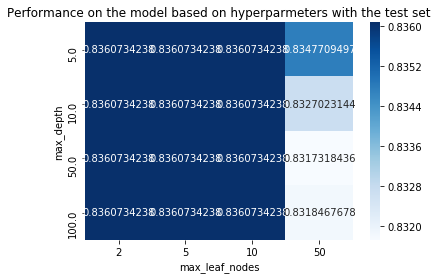

In [0]:
_=sns.heatmap(GS_performance[['max_depth','max_leaf_nodes','test_score']].pivot_table(values='test_score', 
                               index='max_depth', columns='max_leaf_nodes'), annot=True, fmt='.10f', cmap='Blues')
_=plt.title("Performance on the model based on hyperparmeters with the test set")

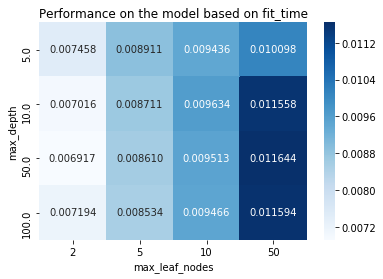

In [0]:
_=sns.heatmap(GS_performance[['max_depth','max_leaf_nodes','fit_time']].pivot_table(values='fit_time', 
                           index='max_depth', columns='max_leaf_nodes'), annot=True, fmt='.6f', cmap='Blues')
_=plt.title("Performance on the model based on fit_time")

## Decision Tree - Visualization

In [0]:
# Initialize the model
tree_viz = DecisionTreeClassifier(max_depth=5,#100,
 max_leaf_nodes=2,#10,
 min_samples_leaf=1,
 min_samples_split=2)
#(class_weight=None, criterion=’gini’, max_depth=3,
 #max_features=None, max_leaf_nodes=None,
 #min_impurity_split=1e-07, min_samples_leaf=1,
 #min_samples_split=2, min_weight_fraction_leaf=0.0,
# presort=False, random_state=None, splitter=’best’)

# Train with a reduced number of columns to see how does it work
#tree_viz.fit(X_train.iloc[:,:10], y_train)
tree_viz.fit(X_train, y_train) #           
             

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
X_train.columns.tolist()[1]

'Type_Paid'

X19: reviews_levels_high
X21: reviews_levels_medium
X10: month_7
X71: year_2018
X11: month_8
X44: Category_GAME
X25: Content Rating_Everyone
X41: Category_FAMILY
X1: Type_Paid


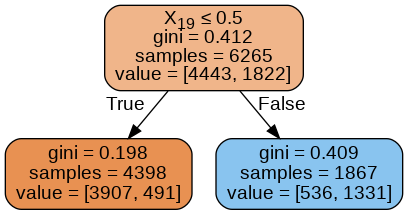

In [0]:
# Show Xs names
X_names = X_train.iloc[:,:5].columns.tolist()
print('X19: reviews_levels_high\nX21: reviews_levels_medium\nX10: month_7\nX71: year_2018\nX11: month_8\nX44: Category_GAME\nX25: Content Rating_Everyone\nX41: Category_FAMILY\nX1: Type_Paid')

dot_data = StringIO()
export_graphviz(tree_viz, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [0]:
y_pred = tree_viz.predict(X_test)

In [0]:
y_check_train = tree_viz.predict_proba(X_train)

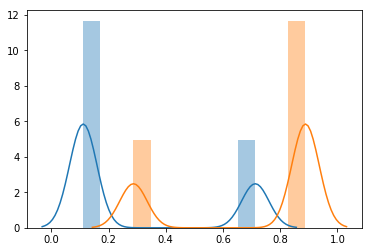

In [0]:
sns.distplot(y_check_train[:,1], bins=10)
sns.distplot(y_check_train[:,0], bins=10)

In [0]:
y_check = tree_viz.predict_proba(X_test)

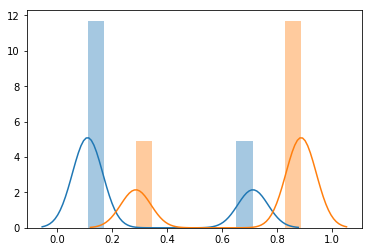

In [0]:
sns.distplot(y_check[:,1], bins=10)
sns.distplot(y_check[:,0], bins=10)

## Decision Tree - Best Model Evaluation

![precision_recall](prec_recall.png "Title")

In [0]:
y_pred = tree_viz.predict(X_test)

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2197
           1       0.72      0.74      0.73       889

    accuracy                           0.84      3086
   macro avg       0.81      0.81      0.81      3086
weighted avg       0.84      0.84      0.84      3086



In [0]:
# Compute confusion matrix to evaluate the accuracy of a classification

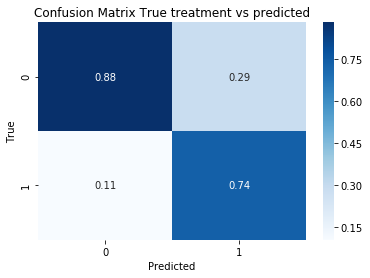

In [0]:
# Normalized (by the number of interviewed people in each class) confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)

_=sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
_=plt.xlabel('Predicted')
_=plt.ylabel('True')
_=plt.title("Confusion Matrix True treatment vs predicted")

In [0]:
# Predict the probabilities of App being successful
y_pred_test = tree_viz.predict_proba(X_test)

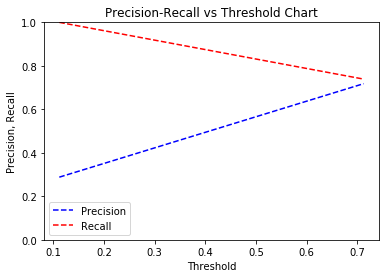

In [0]:
# Visualize how the precision and the recall changes when moving the threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test[:, 1]) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
_=plt.ylim([0,1])

### What is the area under the curve according to the optimal threshold?

![ROC_curve](ROC_curves.png "Title")

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test[:, 1])

AUC: 0.811


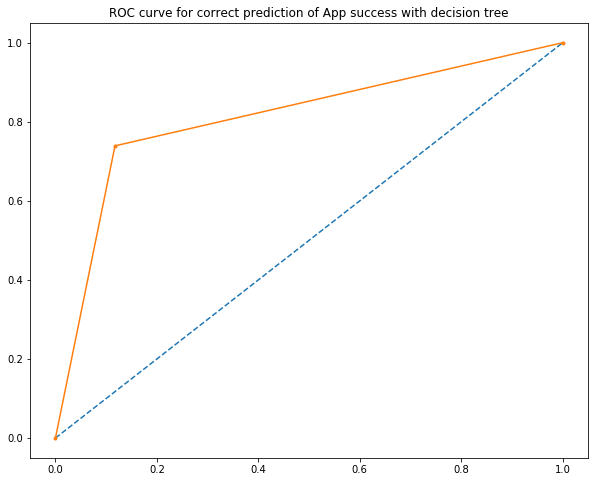

In [0]:
auc = roc_auc_score(y_test, y_pred_test[:, 1])
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test[:, 1])

# plot random case
_=plt.figure(figsize=(10, 8))
_=plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
_=plt.plot(fpr, tpr, marker='.')
_=plt.title("ROC curve for correct prediction of App success with decision tree")